# Lab - EDA Bivariate Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [2]:
df = pd.read_csv('./data/amz_uk_price_prediction_dataset.csv')
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


### 1.1 Crosstab Analysis
Create a crosstab between the product category and the isBestSeller status.

In [3]:
contingency_table = pd.crosstab(df['category'], df['isBestSeller'], margins=True, margins_name='Total')
# contingency_table

Are there categories where being a best-seller is more prevalent?

In [4]:
# calculate best seller proportion, add column, sort it descending
contingency_table['Proportion'] = contingency_table[True] / contingency_table[False]
sorted_contingency_table = contingency_table.sort_values(by='Proportion', ascending=False)

sorted_contingency_table

isBestSeller,False,True,Total,Proportion
category,,,,
Grocery,9008,556,9564,0.061723
Smart Home Security & Lighting,98,6,104,0.061224
Health & Personal Care,9017,552,9569,0.061218
Mobile Phone Accessories,248,11,259,0.044355
Power & Hand Tools,8353,306,8659,0.036634
...,...,...,...,...
Snowboard Boots,1449,0,1449,0.000000
Internal TV Tuner & Video Capture Cards,253,0,253,0.000000
Boxes & Organisers,911,0,911,0.000000


### 1.2 Statistical Tests

1.2.1 Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.

In [5]:
# Chi-square test with previous crosstab table
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f'\nChi-square statistic: {chi2}')
print(f'\nP-value: {p_value}')
print(f'\nDegrees of Freedom: {dof}')
print('\nExpected Frequencies:')
print(expected)


Chi-square statistic: 36844.54643355722

P-value: 0.0

Degrees of Freedom: 888

Expected Frequencies:
[[2.47192100e+02 8.09876605e-01 2.48001977e+02 9.45500094e-05]
 [4.05371826e+03 1.32812156e+01 4.06699947e+03 1.55053134e-03]
 [2.49193722e+02 8.16434527e-01 2.50010156e+02 9.53156218e-05]
 ...
 [1.95260745e+03 6.39733668e+00 1.95900478e+03 7.46864694e-04]
 [2.45196614e+02 8.03338785e-01 2.45999953e+02 9.37867438e-05]
 [2.43567054e+06 7.97999848e+03 2.44365054e+06 9.31634433e-01]]


1.2.2 Compute Cramér's V to understand the strength of association between best-seller status and category.

In [6]:
# Cramér's V
n = contingency_table.sum().sum()  # total number of observations
min_dim = min(contingency_table.shape) - 1  # minimum of (number of rows - 1, number of columns - 1)
cramers_v = np.sqrt(chi2 / (n * min_dim))

print("Cramér's V:", cramers_v)

Cramér's V: 0.03544674431894506


### 1.3 Visualizations

Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

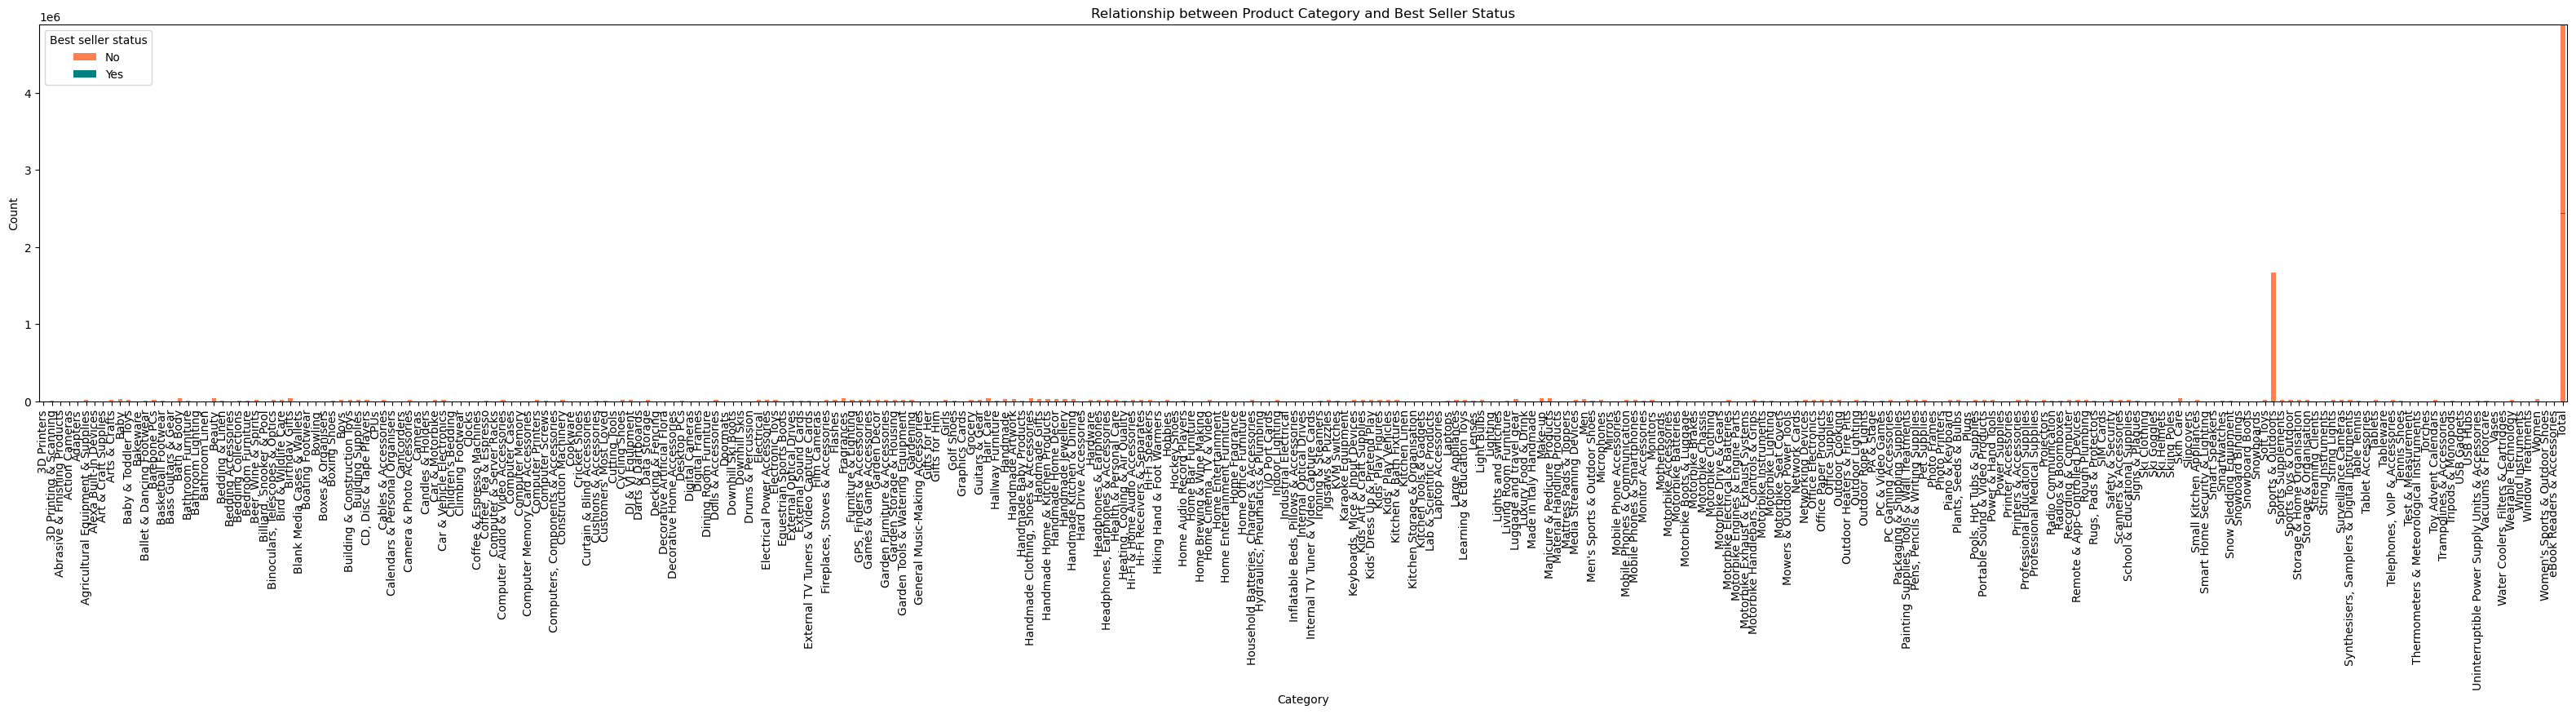

In [7]:
ax = contingency_table.plot(kind='bar', stacked=True, figsize=(40, 6), color=['coral', 'teal'])

ax.set_title('Relationship between Product Category and Best Seller Status')
ax.set_xlabel('Category')
ax.set_ylabel('Count')
ax.legend(title='Best seller status', labels=['No', 'Yes'])

plt.show()

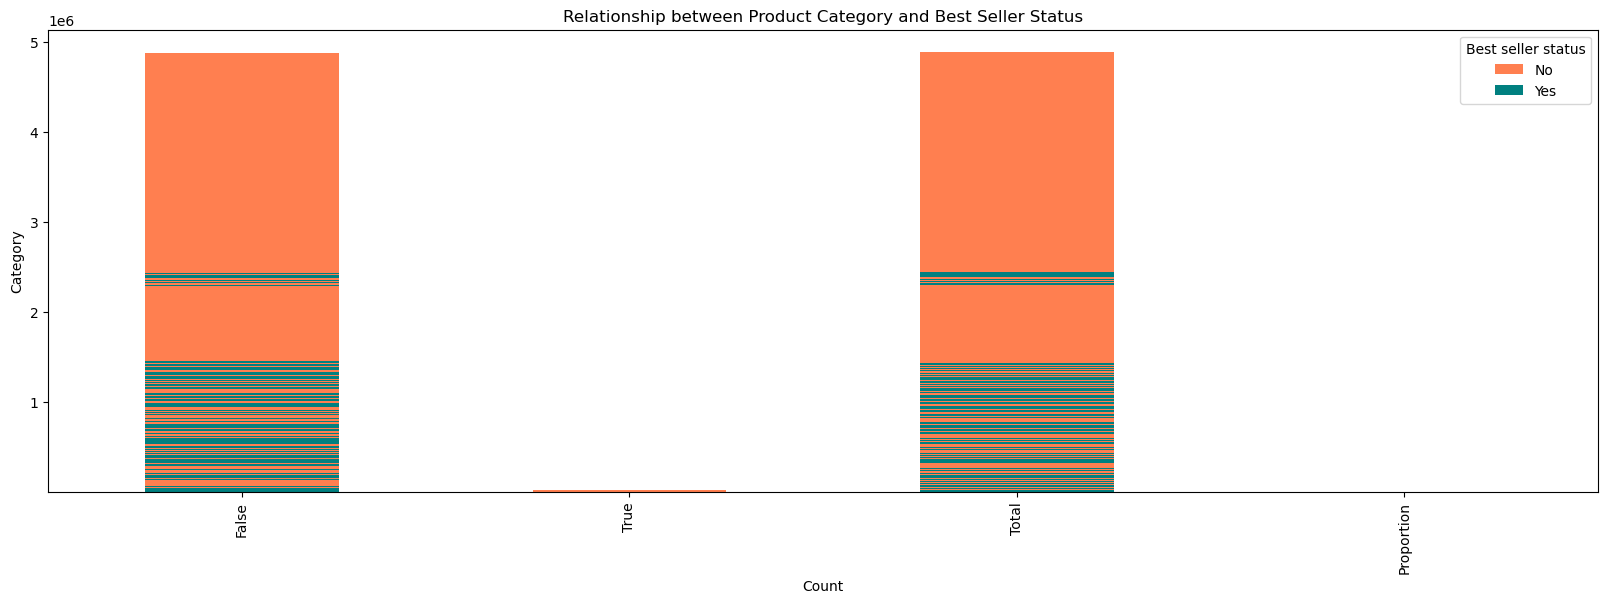

In [8]:
# Transpose the contingency table to swap the axes
ax = contingency_table.T.plot(kind='bar', stacked=True, figsize=(20, 6), color=['coral', 'teal'])

# Update the title and labels
ax.set_title('Relationship between Product Category and Best Seller Status')
ax.set_xlabel('Count')
ax.set_ylabel('Category')
ax.legend(title='Best seller status', labels=['No', 'Yes'])

# Show the plot
plt.show()


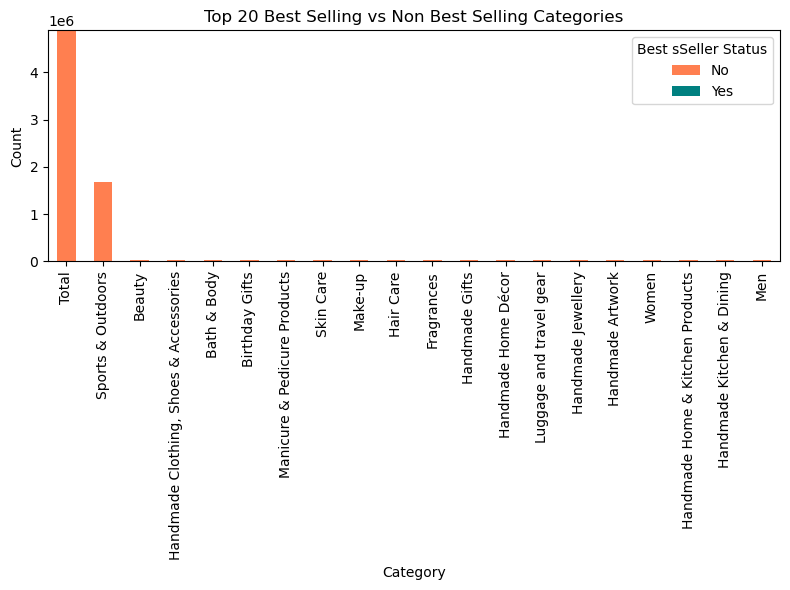

In [9]:
sorted_categories = contingency_table.sum(axis=1).sort_values(ascending=False)

# Get the top 20 most representative categories (based on total count)
top_20_categories = sorted_categories.head(20).index

# Filter the contingency table to only include the top 20 categories
top_20_contingency_table = contingency_table.loc[top_20_categories]

# Plot a stacked bar chart
ax = top_20_contingency_table.plot(kind='bar', stacked=True, figsize=(8, 6), color=['coral', 'teal'])

# Customize the chart
ax.set_title('Top 20 Best Selling vs Non Best Selling Categories')
ax.set_xlabel('Category')
ax.set_ylabel('Count')
ax.legend(title='Best sSeller Status', labels=['No', 'Yes'])

# Display the plot
plt.tight_layout()
plt.show()